# dependencias 

In [14]:
from youtube_transcript_api import YouTubeTranscriptApi
import youtube_dl
import re

# funciones para el limpiado de los datos

In [5]:
def obtener_enlaces_lista_reproduccion(url_lista):
    # Configuración de youtube_dl para obtener solo los enlaces de la lista de reproducción
    ydl_opts = {'extract_flat': True}

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        # Obtener información de la lista de reproducción
        playlist_info = ydl.extract_info(url_lista, download=False)
        
        # Extraer los enlaces de los videos de la lista de reproducción
        enlaces = [video['url'] for video in playlist_info['entries']]

    return enlaces

def obtener_subtitulos_video(url_video):
    try:
        srt = YouTubeTranscriptApi.get_transcript(url_video, languages=['es'])
        subtitulos = [i['text'] for i in srt]
        subtitulos = ' '.join(subtitulos)
        return subtitulos
    except:
        return None

def obtener_subtitulos_videos(lista_enlaces):
    subtitulos = []
    for enlace in lista_enlaces:
        sub = obtener_subtitulos_video(enlace)
        if sub:
            subtitulos.append(sub)
    return subtitulos
            


In [6]:
# lista de los url caso 6
lista_enlaces_caso_6 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH')
# obtener los subtitulos de los videos caso 6
subtitulos_caso_6 = obtener_subtitulos_videos(lista_enlaces_caso_6)
# lista de los url caso 7 por lista de reproduccion
lista_enlaces_caso_7_lista_1 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4I3jzi1nnExmLhDPP2_63yr')
lista_enlaces_caso_7_lista_2 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4K-BNKcKeV4nsvklh1Qi601')
lista_enlaces_caso_7_lista_3 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4In21BprlyQuW8u0oL6lTXS')
# obtener los subtitulos de los videos caso 7 por lista de reproduccion
subtitulos_caso_7_lista_1 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_1)
subtitulos_caso_7_lista_2 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_2)
subtitulos_caso_7_lista_3 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_3)

[youtube:tab] PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH: Downloading webpage
[download] Downloading playlist: Caso 06 de la JEP | Unión Patriótica (UP)
[youtube:tab] Downloading page 1
[youtube:tab] playlist Caso 06 de la JEP | Unión Patriótica (UP): Downloading 22 videos
[download] Downloading video 1 of 22
[download] Downloading video 2 of 22
[download] Downloading video 3 of 22
[download] Downloading video 4 of 22
[download] Downloading video 5 of 22
[download] Downloading video 6 of 22
[download] Downloading video 7 of 22
[download] Downloading video 8 of 22
[download] Downloading video 9 of 22
[download] Downloading video 10 of 22
[download] Downloading video 11 of 22
[download] Downloading video 12 of 22
[download] Downloading video 13 of 22
[download] Downloading video 14 of 22
[download] Downloading video 15 of 22
[download] Downloading video 16 of 22
[download] Downloading video 17 of 22
[download] Downloading video 18 of 22
[download] Downloading video 19 of 22
[download] Downloadin

In [9]:
print(len(subtitulos_caso_6),len(subtitulos_caso_7_lista_1),len(subtitulos_caso_7_lista_2),len(subtitulos_caso_7_lista_3),sep='\n') # 6/7/7/7


20
28
15
13


# limpieza de datos 

## funciones para la limpieza de datos

In [15]:
def limpieza_texto(texto):
    # Eliminar caracteres o palabras entre [] y ()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'\(.*?\)', '', texto)
    # eliminar letras individuales 
    texto = re.sub(r'\b\w\b', '', texto)
    # Eliminar dobles espacios
    texto = re.sub(r'\s+', ' ', texto)
    return texto
def eliminar_sw(texto):
    '''eliminar stopwords'''
    

In [24]:
limpieza_texto(subtitulos_caso_6[1])

'bu muy buenos días siendo las 42 de la mañana del día 19 de octubre del 2022 suscrito profesional especializado grado 33 David aponte del despacho del magistrado Gustavo Salazar arveles Da inicio la continuación de la diligencia de versión voluntaria del compareciente Iván Ramírez Quintero convocada mediante autos at21 del 18 de diciembre del 2020 at 061 del 22 de julio de 2022 para el caso 06 denominado victimización miembros de la unión patriótica por parte de agentes del Estado para efectos del presente trámite se advierten las siguientes pautas tener en cuenta por el desarrollo de la presente diligencia primero los sujetos procesales intervient especiales podrán hacer uso de la palabra únicamente cuando hayan sido autorizadas por el magistrado Salazar segundo los sujetos procesales intervinientes especiales deben emplear lenguaje tono Evo respetuoso para con sus interlocutores demás asistentes esta diligencia tercero los intermi tientes no podrán tomar registros fotográficos de au

In [29]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords_spanish(text):
    stop_words = set(stopwords.words("spanish"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

text = "Este es un ejemplo de frase con algunas palabras vacías incluidas."
cleaned_text = remove_stopwords_spanish(subtitulos_caso_6[0])
print(cleaned_text)


B m k [Música] [Música] [Música] k s hablen listo bien buenos días siendo 8:42 mañana día lunes 12 diciembre 2022 escrito auxiliar judicial despacho magistrado Gustavo Salazar váz permite dar inicio continuación diligencia versión voluntaria compareciente Iván Ramírez Quintero convocada mediante autos at 212 18 diciembre 2020 at 061 22 julio 2022 caso 06 denominado victimización miembros unión patriótica parte agentes efectos presente trámite advierten siguientes pautas cuenta desarrollo diligencia primero sujetos procesales intervinientes podrán hacer uso palabra únicamente sido autorizados magistrado segundo sujetos procesales intervinientes deben emplear lenguaje tono respetuoso interlocutores demás asistentes diligencia tercero intervinientes podrán tomar registros fotográficos audio video diligencia cuarto prohíbe acto atente dignidad partes quinto advierte sesión grabada hará parte expediente caso 06 trasladada víctimas según indicado artículo 27 numeral cuarto ley 1922 2018 sext

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
print(subtitulos_caso_6[0])

B al al m k [Música] [Música] al [Música] k s que hablen listo bien muy buenos días para todos siendo las 8:42 de la mañana del día lunes 12 de diciembre 2022 escrito auxiliar judicial del despacho del magistrado Gustavo Salazar váz permite dar inicio a la continuación de la diligencia de versión voluntaria del compareciente Iván Ramírez Quintero convocada mediante autos at 212 del 18 de diciembre 2020 y at 061 del 22 de julio de 2022 para el caso 06 denominado victimización a miembros de la unión patriótica por parte de agentes del Estado para efectos del presente trámite se advierten las siguientes pautas a en cuenta en el desarrollo de la diligencia primero los sujetos procesales intervinientes podrán hacer uso de la palabra únicamente cuando hayan sido autorizados por el magistrado segundo los sujetos procesales intervinientes deben emplear lenguaje y tono respetuoso para con sus interlocutores y demás asistentes a la diligencia tercero los intervinientes no podrán tomar registros 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


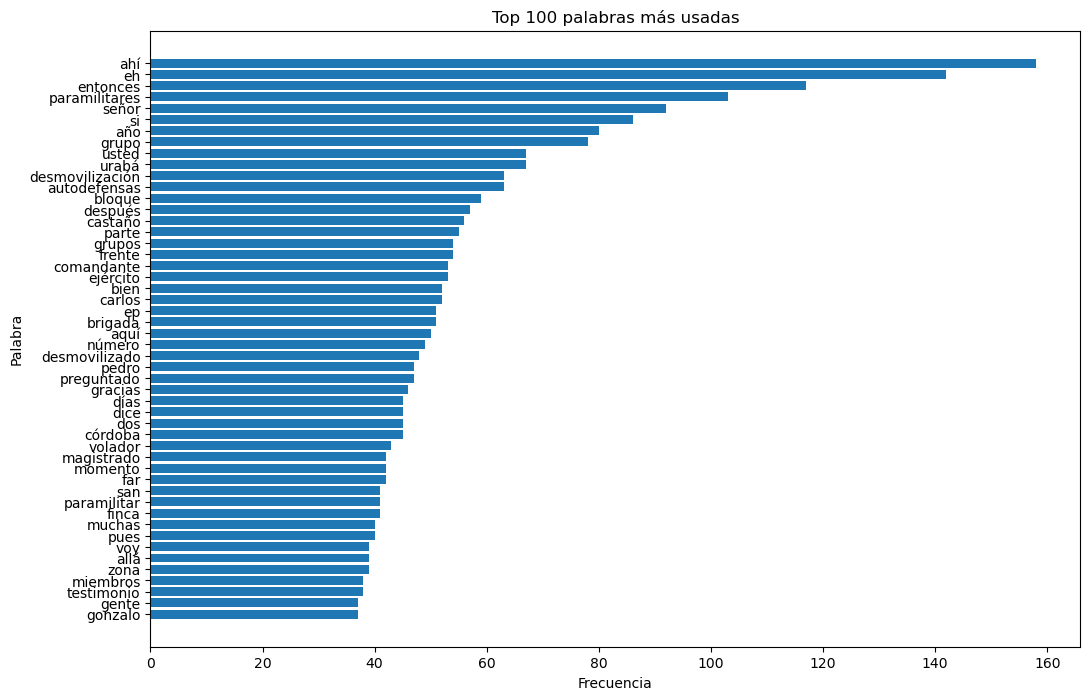

In [35]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def plot_top_words(text, num_words=100):
    # Tokenizar el texto y eliminar signos de puntuación
    words = nltk.tokenize.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]

    # Eliminar palabras vacías (stop words)
    stop_words = set(stopwords.words("spanish"))
    words = [word for word in words if word not in stop_words]

    # Contar la frecuencia de cada palabra
    word_freq = Counter(words)

    # Obtener las palabras más comunes
    top_words = word_freq.most_common(num_words)

    # Preparar datos para el gráfico
    words, freq = zip(*top_words)

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(words)), freq, align='center')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén en la parte superior
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.title('Top 100 palabras más usadas')
    plt.show()

# Ejemplo de texto
texto = "This is an example sentence. It contains some words that will be counted to show the most common words in the text. This is just a dummy text for demonstration purposes."

# Generar el gráfico
plot_top_words(remove_stopwords_spanish(subtitulos_caso_6[0]),50)
